# Custom filters and other infrastructure types

Author: [Geoff Boeing](https://geoffboeing.com/)

Use OSMnx to download and visualize a power line network and a subway system.

  - [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [GitHub repo](https://github.com/gboeing/osmnx)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx-examples)
  - [Documentation](https://osmnx.readthedocs.io/en/stable/)
  - [Journal article/citation](http://geoffboeing.com/publications/osmnx-complex-street-networks/)

In [1]:
import osmnx as ox
%matplotlib inline
ox.config(use_cache=True, log_console=True)
ox.__version__

'0.14.0'

Use custom filters to fine-tune your network. OSMnx uses `network_type` presets to query for streets that allow walking, biking, driving, etc. You can override this by passing a `custom_filter` to specify specific OSM ways you want in your graph.

In [2]:
place = 'Berkeley, California, USA'

# only get motorway ways
cf = '["highway"~"motorway"]'
G = ox.graph_from_place(place, network_type='drive', custom_filter=cf)
print(len(G), 'motorway')

# only get primary ways
cf = '["highway"~"primary"]'
G = ox.graph_from_place(place, network_type='drive', custom_filter=cf)
print(len(G), 'primary')

# use the pipe (|) as Overpass 'or' operator
cf = '["highway"~"motorway|primary"]'
G = ox.graph_from_place(place, network_type='drive', custom_filter=cf)
print(len(G), 'motorway + primary')

36 motorway
11 primary
47 motorway + primary


In [3]:
# network of the canals of amsterdam
place = 'Amsterdam, Netherlands'
G = ox.graph_from_place(place, custom_filter='["waterway"~"canal"]')

To download the road network for an entire country, you often need to limit your query to something like motorways only, to fit in your computer's RAM. For large queries, such as the entire nation of Belgium, OSMnx will subdivide your query into multiple server requests to download all the data, then assemble the graph.

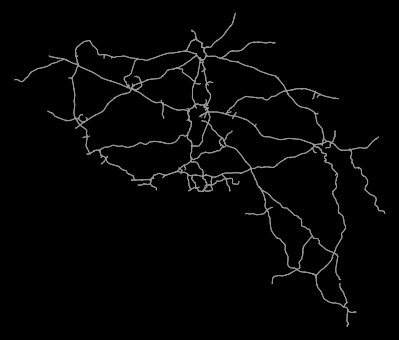

CPU times: user 46.6 s, sys: 328 ms, total: 46.9 s
Wall time: 46.4 s


In [4]:
%%time
# get only motorways, trunks, and their links in all of Belgium
# takes a couple minutes to do all the downloading and processing
cf = '["highway"~"motorway|motorway_link|trunk|trunk_link"]'
G = ox.graph_from_place('Belgium', network_type='drive', custom_filter=cf)
fig, ax = ox.plot_graph(G, node_size=0, bgcolor='k')

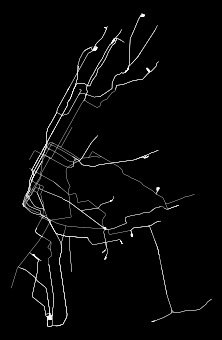

In [5]:
# get NY subway rail network
# note this is rail *infrastructure* and thus includes crossovers, sidings, spurs, yards, etc
# for station-based rail network, you should download a station adjacency matrix elsewhere
G = ox.graph_from_place('New York City, New York', retain_all=False, truncate_by_edge=True,
                        simplify=True, custom_filter='["railway"~"subway"]')

fig, ax = ox.plot_graph(G, node_size=0, edge_color='w', edge_linewidth=0.2, bgcolor='k')